# 3-Layer CNN for Classifciation(using framework)

## 1. 라이브러리 가져오기

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from dataloader import Dataloader

## 2. 학습데이터, test데이터 로드하기

In [7]:
# 데이터 로드해오기
train_loader = Dataloader(path="./", is_train = True, shuffle=True)
test_loader = Dataloader(path="./", is_train = False, shuffle=True)

train_images= train_loader.images
train_labels = train_loader.labels
test_images = test_loader.images
test_labels = test_loader.labels

# normalization: 0과 1사이로 정규화 시키기
train_images = train_images/255.
test_images = test_images/255.

train_images = train_images.transpose(0, 2, 3, 1)
test_images = test_images.transpose(0, 2, 3, 1)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


train_images: (60000, 784)

test_images: (60000, 10)

train_labels: (10000, 784)

test_labels: (10000, 10)

## 3. model 만들기(CNN)
### input-conv-ReLU-maxpooling-conv-ReLU-maxpooling-linear-softmax

In [8]:
# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## 4. 학습하고 정확도 측정하기

In [9]:
history = model.fit(train_images, train_labels, epochs=100, batch_size=100, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5221 - loss: 1.6232 - val_accuracy: 0.9045 - val_loss: 0.3222
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9079 - loss: 0.3109 - val_accuracy: 0.9369 - val_loss: 0.2186
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9349 - loss: 0.2160 - val_accuracy: 0.9552 - val_loss: 0.1561
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9503 - loss: 0.1661 - val_accuracy: 0.9625 - val_loss: 0.1287
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9589 - loss: 0.1376 - val_accuracy: 0.9675 - val_loss: 0.1101
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9665 - loss: 0.1154 - val_accuracy: 0.9716 - val_loss: 0.0945
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9700 - loss: 0.0997 - val_accuracy: 0.9735 - val_loss: 0.0855
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9719 - loss: 0.0920 - val_a

# <결과물>

## Result1. Loss graph 그리기

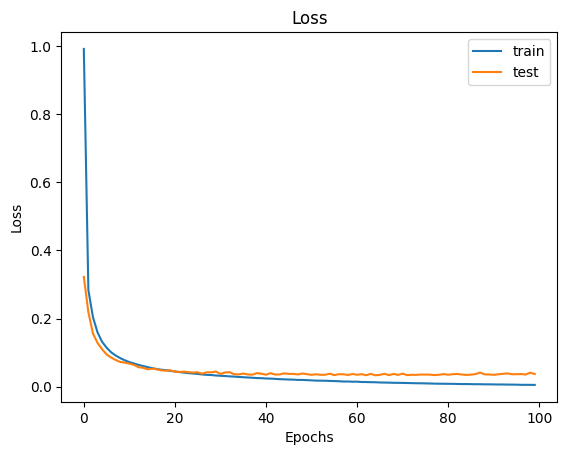

In [10]:
# loss 그래프
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Result2. confusion matrix 그리기

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


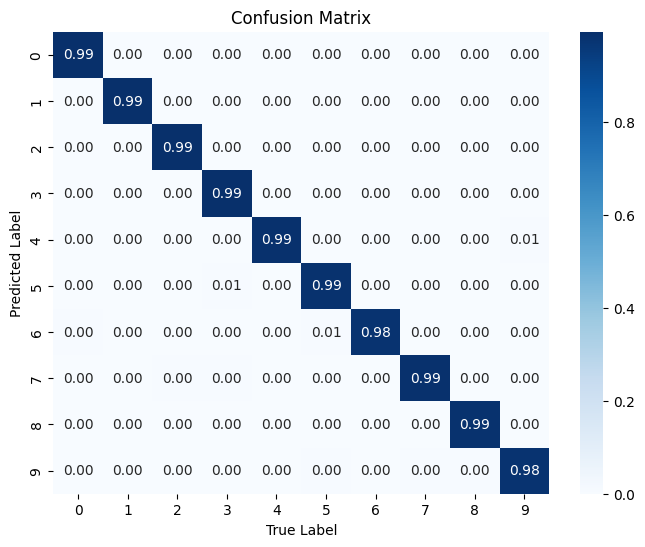

In [11]:
# 예측값 생성
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Confusion Matrix 생성 및 정규화
cm = confusion_matrix(y_true, y_pred_classes, normalize='true')

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('True Label')  
plt.ylabel('Predicted Label')  
plt.title('Confusion Matrix')
plt.show()


## Result3-1. Top3 images 뽑아내기

(10000, 10)
(10000, 10)


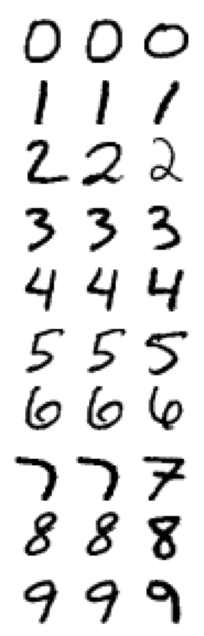

In [12]:
print(y_pred.shape)
print(test_labels.shape)

top3_data = [[] for _ in range(10)]

for i in range(len(y_pred)):
    for j in range(10):
        if len(top3_data[j])<3:
            top3_data[j].append((i,y_pred[i][j]))
        else:
            for k in range(3):
                if top3_data[j][k][1]<y_pred[i][j]:
                    top3_data[j].remove(min(top3_data[j], key=lambda x: x[1]))
                    top3_data[j].append((i,y_pred[i][j]))
                else:
                    continue

top3_sort = [[] for _ in range(10)]
for i in range(10):
    top3_sort[i] = sorted(top3_data[i], key= lambda x: x[1], reverse=True)

final_combined_image = None
for i in range(10):
    image1 = 1 - test_loader.images[top3_sort[i][0][0]].reshape(28,28)
    image2 = 1 - test_loader.images[top3_sort[i][1][0]].reshape(28,28) 
    image3 = 1 - test_loader.images[top3_sort[i][2][0]].reshape(28,28) 
    combined_image = np.hstack((image1, image2, image3))
    if final_combined_image is None:
        final_combined_image = combined_image
    else:
        # 기존의 final_combined_image에 새로 연결된 이미지를 세로로 추가
        final_combined_image = np.vstack((final_combined_image, combined_image))

    # 결과 출력
plt.figure(figsize=(8, 8))
plt.imshow(final_combined_image, cmap='gray')
plt.axis('off')  # 축 숨기기
plt.show()



## Result3-2. Top3 images에 대한 확률 뽑아내기

In [13]:
for i in range(10):
    print(f"{round(top3_sort[i][0][1]*100,1)}%, {round(top3_sort[i][1][1]*100,1)}%, {round(top3_sort[i][2][1]*100,1)}%")
    print()

100.0%, 100.0%, 100.0%

100.0%, 100.0%, 100.0%

100.0%, 100.0%, 100.0%

100.0%, 100.0%, 100.0%

100.0%, 100.0%, 100.0%

100.0%, 100.0%, 100.0%

100.0%, 100.0%, 100.0%

100.0%, 100.0%, 100.0%

100.0%, 100.0%, 100.0%

100.0%, 100.0%, 100.0%

